In [142]:
import os
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.data import Dataset
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm

In [143]:
data = pd.read_csv('C:/Users/admin/Documents/Bangkit/bangkit-assignment5/Dataset_spine.csv')
df = data

In [144]:
df.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [145]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [146]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [147]:
df['Class_att'].replace({"Abnormal": 1, "Normal": 0}, inplace=True)

In [148]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
Col1         310 non-null float64
Col2         310 non-null float64
Col3         310 non-null float64
Col4         310 non-null float64
Col5         310 non-null float64
Col6         310 non-null float64
Col7         310 non-null float64
Col8         310 non-null float64
Col9         310 non-null float64
Col10        310 non-null float64
Col11        310 non-null float64
Col12        310 non-null float64
Class_att    310 non-null int64
dtypes: float64(12), int64(1)
memory usage: 31.6 KB


In [126]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [127]:
df_train = df_train.reindex(np.random.permutation(df_train.index))
df_test = df_test.reindex(np.random.permutation(df_test.index)) 

In [128]:
df_train.shape

(248, 13)

In [129]:
# Calculate the Z-scores of each column in the training set and
# write those Z-scores into a new pandas DataFrame named train_df_norm.
df_train_mean = df_train.mean()
df_train_std = df_train.std()
df_train_norm = (df_train - df_train_mean)/df_train_std

# Examine some of the values of the normalized training set. Notice that most 
# Z-scores fall between -2 and +2.
df_train_norm.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
253,0.199735,0.403542,0.699553,-0.053503,0.156148,-0.429733,0.472321,0.038380,-1.520626,-1.058514,0.436963,0.911007,-1.432974
63,1.067875,0.407228,0.614889,1.054531,-0.203993,0.050647,-1.492875,0.379171,0.626452,-0.250462,-0.749553,-0.862407,0.695035
172,-0.245269,-0.419525,-0.498817,0.007481,-1.812009,-0.141638,0.181565,-1.504809,1.465265,1.081107,-0.184886,0.787207,0.695035
264,-0.380480,-1.112271,-0.324682,0.365056,-0.434433,-0.984078,0.126425,0.796853,1.625290,0.124053,1.629891,1.784970,-1.432974
152,0.175503,-0.350951,-0.263400,0.493371,-0.424931,0.210870,-1.258922,-0.036292,0.001800,0.505166,-0.831444,-1.529178,0.695035


In [130]:
# Calculate the Z-scores of each column in the test set and
# write those Z-scores into a new pandas DataFrame named test_df_norm.
df_test_mean = df_test.mean()
df_test_std  = df_test.std()
df_test_norm = (df_test - df_test_mean)/df_test_std

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


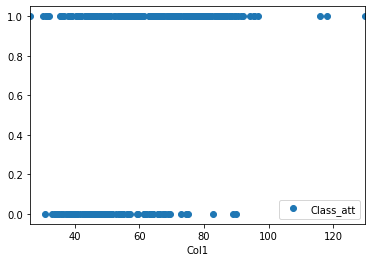

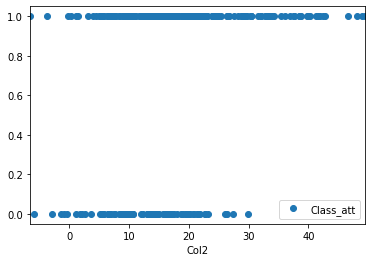

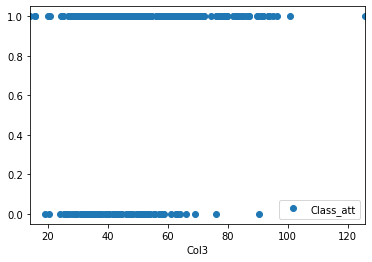

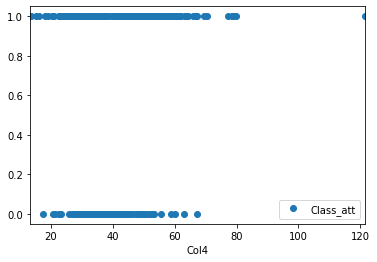

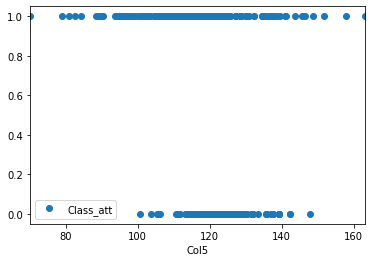

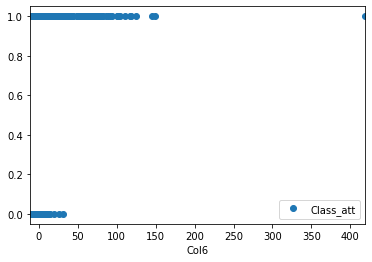

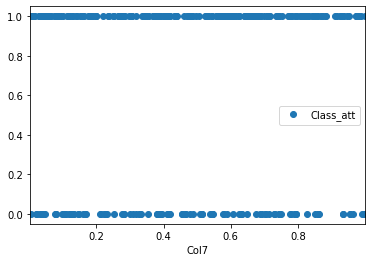

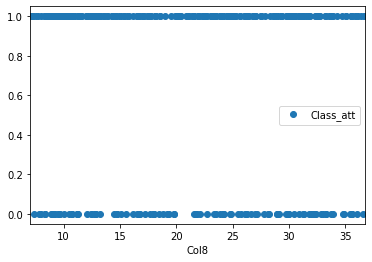

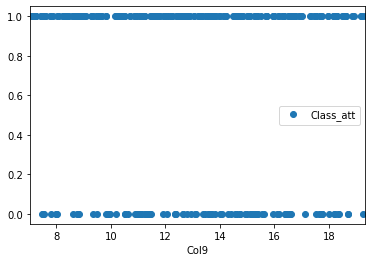

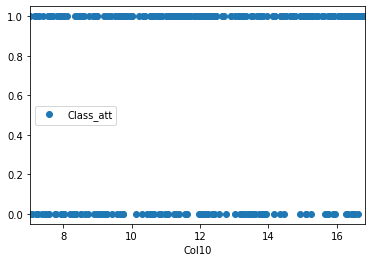

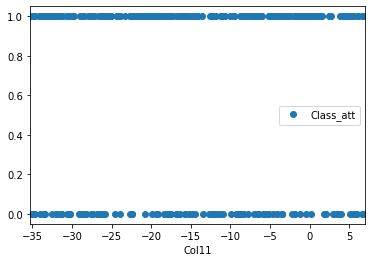

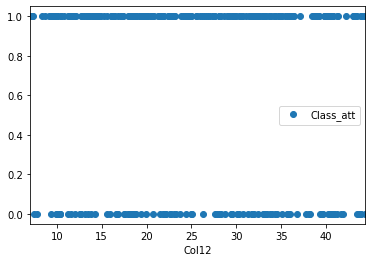

In [131]:
# Feature Selection
print(df.plot(x='Col1', y='Class_att', style='o'))
print(df.plot(x='Col2', y='Class_att', style='o'))
print(df.plot(x='Col3', y='Class_att', style='o'))
print(df.plot(x='Col4', y='Class_att', style='o'))
print(df.plot(x='Col5', y='Class_att', style='o'))
print(df.plot(x='Col6', y='Class_att', style='o'))
print(df.plot(x='Col7', y='Class_att', style='o'))
print(df.plot(x='Col8', y='Class_att', style='o'))
print(df.plot(x='Col9', y='Class_att', style='o'))
print(df.plot(x='Col10', y='Class_att', style='o'))
print(df.plot(x='Col11', y='Class_att', style='o'))
print(df.plot(x='Col12', y='Class_att', style='o'))

In [132]:
feature_set = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6']

In [133]:
def tf_feature_columns(input_features):
    feature_columns = []
    for my_feature in input_features:
        feature_columns.append(tf.feature_column.numeric_column(my_feature))
    return feature_columns

In [134]:
tf_feature_columns = tf_feature_columns(feature_set)
feature_layer = layers.DenseFeatures(tf_feature_columns)
feature_layer(dict(df_train))

<tf.Tensor: shape=(248, 6), dtype=float32, numpy=
array([[ 63.792427 ,  21.345324 ,  66.       ,  42.4471   , 119.55039  ,
         12.382604 ],
       [ 77.690575 ,  21.380644 ,  64.42944  ,  56.309933 , 114.81875  ,
         26.93184  ],
       [ 56.668293 ,  13.458203 ,  43.76971  ,  43.21009  ,  93.69221  ,
         21.108122 ],
       ...,
       [ 75.29848  ,  16.671484 ,  61.296204 ,  58.626995 , 118.883385 ,
         31.575823 ],
       [ 42.517273 ,  14.375671 ,  25.323565 ,  28.141602 , 128.90569  ,
          0.7570201],
       [ 65.6118   ,  23.137918 ,  62.58218  ,  42.473885 , 124.128    ,
         -4.083298 ]], dtype=float32)>

In [135]:
#@title Define the functions that create and train a model.
def create_model(my_learning_rate, tf_feature_columns, my_metrics):
  """Create and compile a simple classification model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
  model.add(tf_feature_columns)

  # Funnel the regression value through a sigmoid function.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  # Call the compile method to construct the layers into a model that
  # TensorFlow can execute.  Notice that we're using a different loss
  # function for classification than for regression.    
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model        


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist  

print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


In [136]:
#@title Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


Train on 248 samples
Epoch 1/20
248/248 [==============================] - 1s 3ms/sample - loss: 39.9490 - accuracy: 0.6734
Epoch 2/20
248/248 [==============================] - 0s 39us/sample - loss: 39.3881 - accuracy: 0.6734
Epoch 3/20
248/248 [==============================] - 0s 95us/sample - loss: 39.0097 - accuracy: 0.6734
Epoch 4/20
248/248 [==============================] - 0s 58us/sample - loss: 38.6616 - accuracy: 0.6734
Epoch 5/20
248/248 [==============================] - 0s 53us/sample - loss: 38.3268 - accuracy: 0.6734
Epoch 6/20
248/248 [==============================] - 0s 33us/sample - loss: 38.0263 - accuracy: 0.6734
Epoch 7/20
248/248 [==============================] - 0s 26us/sample - loss: 37.7364 - accuracy: 0.6734
Epoch 8/20
248/248 [==============================] - 0s 50us/sample - loss: 37.4346 - accuracy: 0.6734
Epoch 9/20
248/248 [==============================] - 0s 51us/sample - loss: 37.1513 - accuracy: 0.6734
Epoch 10/20
248/248 [=======================

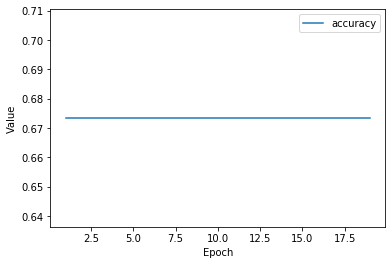

In [137]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "Class_att"
classification_threshold = 0.35

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, df_train, epochs, 
                           label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

In [138]:
# Evaluate the model against the test set
features = {name:np.array(value) for name, value in df_test.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

62/62 [==============================] - 0s 2ms/sample - loss: 31.3913 - accuracy: 0.6935


[31.391305923461914, 0.6935484]

Train on 248 samples
Epoch 1/20
248/248 [==============================] - 1s 4ms/sample - loss: 9.4653 - accuracy: 0.6734 - precision: 0.6734 - recall: 1.0000
Epoch 2/20
248/248 [==============================] - 0s 59us/sample - loss: 8.8971 - accuracy: 0.6734 - precision: 0.6734 - recall: 1.0000
Epoch 3/20
248/248 [==============================] - 0s 66us/sample - loss: 8.5035 - accuracy: 0.6694 - precision: 0.6721 - recall: 0.9940
Epoch 4/20
248/248 [==============================] - 0s 53us/sample - loss: 8.1791 - accuracy: 0.6653 - precision: 0.6707 - recall: 0.9880
Epoch 5/20
248/248 [==============================] - 0s 53us/sample - loss: 7.8774 - accuracy: 0.6573 - precision: 0.6680 - recall: 0.9760
Epoch 6/20
248/248 [==============================] - 0s 57us/sample - loss: 7.6000 - accuracy: 0.6613 - precision: 0.6708 - recall: 0.9760
Epoch 7/20
248/248 [==============================] - 0s 43us/sample - loss: 7.3351 - accuracy: 0.6653 - precision: 0.6736 - recall: 0.9760


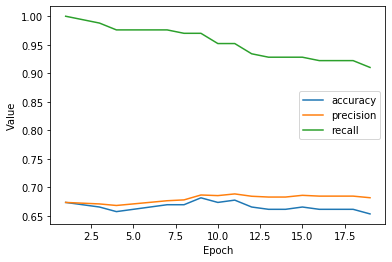

In [139]:
# Add precision and recall as metrics
#@title Double-click to view the solution for Task 3.

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.35
label_name = "Class_att"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, df_train, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)


# The new graphs suggest that precision and recall are 
# somewhat in conflict. That is, improvements to one of
# those metrics may hurt the other metric.

Train on 248 samples
Epoch 1/20
248/248 [==============================] - 1s 5ms/sample - loss: 41.7678 - accuracy: 0.6734 - precision: 0.6734 - recall: 1.0000
Epoch 2/20
248/248 [==============================] - 0s 45us/sample - loss: 41.1963 - accuracy: 0.6734 - precision: 0.6734 - recall: 1.0000
Epoch 3/20
248/248 [==============================] - 0s 44us/sample - loss: 40.7826 - accuracy: 0.6734 - precision: 0.6734 - recall: 1.0000
Epoch 4/20
248/248 [==============================] - 0s 50us/sample - loss: 40.4433 - accuracy: 0.6734 - precision: 0.6734 - recall: 1.0000
Epoch 5/20
248/248 [==============================] - 0s 47us/sample - loss: 40.1219 - accuracy: 0.6734 - precision: 0.6734 - recall: 1.0000
Epoch 6/20
248/248 [==============================] - 0s 57us/sample - loss: 39.8242 - accuracy: 0.6734 - precision: 0.6734 - recall: 1.0000
Epoch 7/20
248/248 [==============================] - 0s 38us/sample - loss: 39.5282 - accuracy: 0.6734 - precision: 0.6734 - recall: 

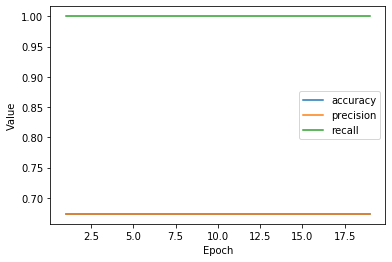

In [140]:
# Experiment with the classification threshold (if time permits)

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.52
label_name = "Class_att"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, df_train, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

# A `classification_threshold` of slightly over 0.5
# appears to produce the highest accuracy (about 83%).
# Raising the `classification_threshold` to 0.9 drops 
# accuracy by about 5%.  Lowering the 
# `classification_threshold` to 0.3 drops accuracy by 
# about 3%. 

Train on 248 samples
Epoch 1/20
248/248 [==============================] - 1s 4ms/sample - loss: 160.8322 - auc: 0.5000
Epoch 2/20
248/248 [==============================] - 0s 54us/sample - loss: 159.3974 - auc: 0.5000
Epoch 3/20
248/248 [==============================] - 0s 44us/sample - loss: 158.3777 - auc: 0.5000
Epoch 4/20
248/248 [==============================] - 0s 65us/sample - loss: 157.4850 - auc: 0.5000
Epoch 5/20
248/248 [==============================] - 0s 67us/sample - loss: 156.6797 - auc: 0.5000
Epoch 6/20
248/248 [==============================] - 0s 52us/sample - loss: 155.9146 - auc: 0.5000
Epoch 7/20
248/248 [==============================] - 0s 65us/sample - loss: 155.1753 - auc: 0.5000
Epoch 8/20
248/248 [==============================] - 0s 55us/sample - loss: 154.4671 - auc: 0.5000
Epoch 9/20
248/248 [==============================] - 0s 61us/sample - loss: 153.7674 - auc: 0.5000
Epoch 10/20
248/248 [==============================] - 0s 64us/sample - loss: 15

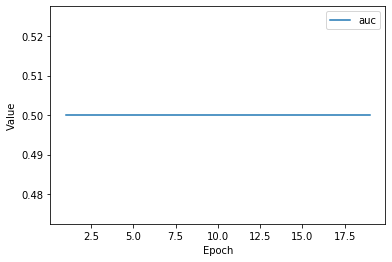

In [141]:
# Summarize model performance (if time permits)

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "Class_att"

# AUC is a reasonable "summary" metric for 
# classification models.
# Here is the updated definition of METRICS to 
# measure AUC:
METRICS = [
      tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, df_train, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['auc'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)